<a href="https://colab.research.google.com/github/jeremicmilos/PPPO_IT77-2018-Jeremic-Milos/blob/main/IT77_2018_Milo%C5%A1_Jeremi%C4%87.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Predmet**: Principi prezentacije i prepoznavanje oblika

**Tema**: Detekcija/klasifikacija

**Student**: Miloš Jeremić IT 77/2018

Prvi korak jeste učitavanje podataka koji se nalaze u zip folderu na Google Drive-u

In [ ]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1swD3_-acnDAOigOiZlKlf-a5OPw7ebNS' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1swD3_-acnDAOigOiZlKlf-a5OPw7ebNS" -O images.zip && rm -rf /tmp/cookies.txt

--2022-09-11 16:20:29--  https://docs.google.com/uc?export=download&confirm=t&id=1swD3_-acnDAOigOiZlKlf-a5OPw7ebNS
Resolving docs.google.com (docs.google.com)... 173.194.217.102, 173.194.217.100, 173.194.217.113, ...
Connecting to docs.google.com (docs.google.com)|173.194.217.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0g-64-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/vfti39ltc5kvn2jseh53vdekotos9rqj/1662913200000/06049624160957438625/*/1swD3_-acnDAOigOiZlKlf-a5OPw7ebNS?e=download&uuid=c93500f5-e799-4238-847a-246dcf41ee75 [following]
--2022-09-11 16:20:29--  https://doc-0g-64-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/vfti39ltc5kvn2jseh53vdekotos9rqj/1662913200000/06049624160957438625/*/1swD3_-acnDAOigOiZlKlf-a5OPw7ebNS?e=download&uuid=c93500f5-e799-4238-847a-246dcf41ee75
Resolving doc-0g-64-docs.googleusercontent.com (doc-0g-64-docs.googleusercontent.com)... 74.125.28.13

Nakon učitavanja podataka, potrebno je izvršiti unzip podataka kako bi se mogli koristiti.

In [ ]:
!unzip images.zip

Streaming output truncated to the last 5000 lines.
  inflating: train_images/99f75320d.jpg  
  inflating: train_images/99f9d2375.jpg  
  inflating: train_images/99fd3c6f5.jpg  
  inflating: train_images/9a016fe15.jpg  
  inflating: train_images/9a064450d.jpg  
  inflating: train_images/9a08c2783.jpg  
  inflating: train_images/9a18e4457.jpg  
  inflating: train_images/9a1f7c238.jpg  
  inflating: train_images/9a2523ce9.jpg  
  inflating: train_images/9a3e774ff.jpg  
  inflating: train_images/9a5e9e77c.jpg  
  inflating: train_images/9a5f7a855.jpg  
  inflating: train_images/9a62177bb.jpg  
  inflating: train_images/9a67575cf.jpg  
  inflating: train_images/9a6ac5406.jpg  
  inflating: train_images/9a70057c0.jpg  
  inflating: train_images/9a72fd89e.jpg  
  inflating: train_images/9a75974ba.jpg  
  inflating: train_images/9a762b892.jpg  
  inflating: train_images/9a7b2f3af.jpg  
  inflating: train_images/9a7b427b4.jpg  
  inflating: train_images/9a81a8056.jpg  
  inflating: train_images

Kako fotografije još uvek nisu vidljive ljudskim okom, potrebno je učitati pojedine fotografije.

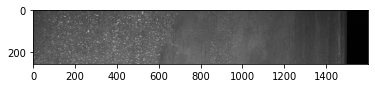

In [ ]:
from skimage.io import imread
import numpy as np
import matplotlib.pyplot as plt
image =(imread('train_images/f950b713a.jpg'))
plt.imshow(image)
plt.show()

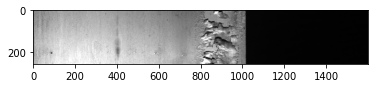

In [ ]:
from skimage.io import imread
import numpy as np
import matplotlib.pyplot as plt
image =(imread('train_images/f83ee60b3.jpg'))
plt.imshow(image)
plt.show()

Kako se na fotografijama ne vidi baš lepo šta je tačno na njoj, uz pomoć interneta, utvrđeno je da se na fotografijama nalaze slike čelika i njegova oštećena.

Za dalju izradu projekta, neophodno je improtovati sve potrebne biblioteke i module koji će se koristiti u daljoj izradi projekta.

In [ ]:
import os
import glob
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
import keras
from PIL import Image
from pathlib import Path
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from keras.models import Sequential, Model, load_model
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Input, Flatten, Activation
from keras.optimizers import adam_v2, sgd_experimental, rmsprop_v2
from keras.callbacks import Callback, EarlyStopping
from keras.utils import tf_utils
from sklearn.metrics import confusion_matrix
from keras import backend as K
import tensorflow as tf
from tqdm import tqdm
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
%matplotlib inline

Sledeći korak jeste učitavnje csv fajla u okviru kog je se nalaze nazivi fotografija, klase kojoj pripadaju i enkodovane vrednosti piksela fotografija.

In [ ]:
data = pd.read_csv("/content/train.csv")

Naredni koraci pretstavljaju samo upoznavanje sa podacima


3    5150
1     897
4     801
2     247
Name: ClassId, dtype: int64

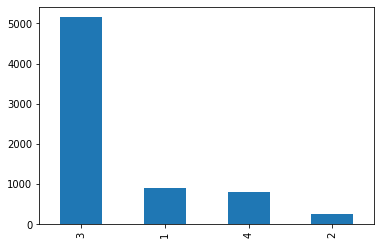

In [ ]:
data["ClassId"].value_counts().plot(kind = 'bar')
data["ClassId"].value_counts()

In [ ]:
data.shape

(7095, 3)

In [ ]:
data.info

<bound method DataFrame.info of             ImageId  ClassId  \
0     0002cc93b.jpg        1   
1     0007a71bf.jpg        3   
2     000a4bcdd.jpg        1   
3     000f6bf48.jpg        4   
4     0014fce06.jpg        3   
...             ...      ...   
7090  ffcf72ecf.jpg        3   
7091  fff02e9c5.jpg        3   
7092  fffe98443.jpg        3   
7093  ffff4eaa8.jpg        3   
7094  ffffd67df.jpg        3   

                                          EncodedPixels  
0     29102 12 29346 24 29602 24 29858 24 30114 24 3...  
1     18661 28 18863 82 19091 110 19347 110 19603 11...  
2     37607 3 37858 8 38108 14 38359 20 38610 25 388...  
3     131973 1 132228 4 132483 6 132738 8 132993 11 ...  
4     229501 11 229741 33 229981 55 230221 77 230468...  
...                                                 ...  
7090  121911 34 122167 101 122422 169 122678 203 122...  
7091  207523 3 207777 9 208030 15 208283 22 208537 2...  
7092  105929 5 106177 14 106424 24 106672 33 106923 ...  
709

In [ ]:
data

,ImageId,ClassId,EncodedPixels
0,0002cc93b.jpg,1,29102 12 29346 24 29602 24 29858 24 30114 24 3...
1,0007a71bf.jpg,3,18661 28 18863 82 19091 110 19347 110 19603 11...
2,000a4bcdd.jpg,1,37607 3 37858 8 38108 14 38359 20 38610 25 388...
3,000f6bf48.jpg,4,131973 1 132228 4 132483 6 132738 8 132993 11 ...
4,0014fce06.jpg,3,229501 11 229741 33 229981 55 230221 77 230468...
...,...,...,...
7090,ffcf72ecf.jpg,3,121911 34 122167 101 122422 169 122678 203 122...
7091,fff02e9c5.jpg,3,207523 3 207777 9 208030 15 208283 22 208537 2...
7092,fffe98443.jpg,3,105929 5 106177 14 106424 24 106672 33 106923 ...
7093,ffff4eaa8.jpg,3,16899 7 17155 20 17411 34 17667 47 17923 60 18...


**Augmentacija fotografija**

Augmentacija fotografija predstavlja proceduru u okviru koje se skup podataka ciljano proširuje primenom različitih transformacija koje se sprovode nad slikama. 

Narednom linijom je odrađena promena veličine slika na (150,150)

In [ ]:
l1=[]
l2=[]
for img,ClassId,EncodedPixels in tqdm(data.values):
  image=cv2.imread("/content/train_images/{}".format(img), cv2.IMREAD_COLOR)
  image=cv2.resize(image, (150,150))
  l1.append(image)
  l2.append(ClassId)

100%|██████████| 7095/7095 [00:50<00:00, 141.09it/s]


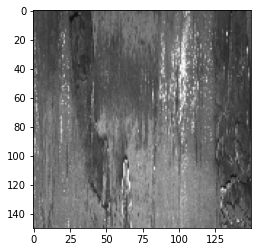

In [ ]:
i = 102
plt.imshow(l1[i])

Naredna linija predstavlja transfomraciju podataka u binarne kako bi dalja obrada bila lakša.

In [ ]:
encoder = LabelEncoder()

X=np.array(l1)
X=X/255

y=encoder.fit_transform(l2)
y=to_categorical(y)

Narednom linijom urađena je podela podataka u odnosu: 80% za treniranje i 20% za testiranje.

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y,shuffle=True,random_state=32)

In [ ]:
print("X trening: ",X_train.shape)
print("X test: ",X_test.shape)
print("y trening: ",y_train.shape)
print("y test: ",y_test.shape)

X trening:  (5676, 150, 150, 3)
X test:  (1419, 150, 150, 3)
y trening:  (5676, 4)
y test:  (1419, 4)


**Kreiranje Konvolucijske Neuronske Mreže (CNN) modela**

U okviru dubokog učenja, konvoluciona neuronska mreža ili CNN je vrsta veštačke neuronske mreže, koja se široko koristi za prepoznavanje slika/objekata i klasifikaciju. Duboko učenje tako prepoznaje objekte na slici pomoću CNN-a. CNN igraju glavnu ulogu u različitim zadacima/funkcijama kao što su problemi obrade slike, zadaci kompjuterskog vida kao što su lokalizacija i segmentacija, video analiza, za prepoznavanje prepreka u automobilima koji se sami voze, kao i prepoznavanje govora u procesu obrade prirodnog jezika. Pošto CNN igraju značajnu ulogu u ovim oblastima koje se brzo rastu i nastaju, veoma su popularne u dubokom učenju.

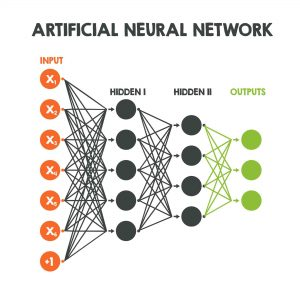

Narednom ćelijom je izgrađen sam CNN model.

In [ ]:
model=Sequential()
model.add(Conv2D(32,(3,3),input_shape=(150,150,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Flatten())
model.add(Dense(256,activation="relu"))
model.add(Dense(4,activation="softmax"))

Nakon izgradnje, narednom linijom prikazaće se detalji tog modela.

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 15, 15, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 14400)             0         
                                                                 
 dense (Dense)               (None, 256)               3

Kada metrike prestanu da ostavaruju bolje rezultate, narednom linijom će se zaustaviti treniranje modela. To će se izvršiti pomoću klase EarlyStopping koja sadrži argumente: 

**patience** - broj epoha nakon koje se prekida trening ukoliko u okviru svake od epoha metrike ne pokažu bolje rezultate

**min_delta** - minimalna promena praćene metrike koja će se smatrati poboljšanjem

**restore_best_weights** - da li vratiti najbolje rezultate iz prethodne epohe u trenutnu epohu

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(patience=5,min_delta=0.001,restore_best_weights=True,)

**Kompajlovanje modela**

Optimizator kontroliše brzinu učenja. Koristiće se *Adam* kao optimizator. *Adam* je generalno dobar optimizator za upotrebu u mnogim slučajevima. On prilagođava brzinu učenja tokom obuke. Za funkciju gubitka koristiće se *categorical_crossentropy*. Ovo je najčešći izbor za klasifikaciju. Niži rezultat ukazuje na to da model radi bolje. Kao metriku koristiće se *accuracy* da bi se video rezultat tačnosti na skupu provere prilikom obuke modela.

In [ ]:
from sklearn import metrics
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=tf.keras.optimizers.Adam(),metrics=["accuracy"])

Naredna ćelija jeste treniranje modela. Za to će se koristiti funkcija *fit*. Broj epoha je broj broj puta koji će model proći kroz podatke. Što se više epoha vode, to će se model poboljšavati do određene tačke. Nakon toga, model će prestati da se poboljšava tokom svake epohe.

In [ ]:
history = model.fit(X_train,y_train,epochs=20,validation_data=(X_test,y_test),batch_size=128,
                    verbose=1, callbacks=[early_stopping])

Epoch 1/20
45/45 [==============================] - 108s 2s/step - loss: 0.8452 - accuracy: 0.7197 - val_loss: 0.7188 - val_accuracy: 0.7477
Epoch 2/20
45/45 [==============================] - 106s 2s/step - loss: 0.6694 - accuracy: 0.7477 - val_loss: 0.6685 - val_accuracy: 0.7576
Epoch 3/20
45/45 [==============================] - 106s 2s/step - loss: 0.6057 - accuracy: 0.7616 - val_loss: 0.6393 - val_accuracy: 0.7512
Epoch 4/20
45/45 [==============================] - 106s 2s/step - loss: 0.5580 - accuracy: 0.7711 - val_loss: 0.6042 - val_accuracy: 0.7463
Epoch 5/20
45/45 [==============================] - 106s 2s/step - loss: 0.5233 - accuracy: 0.7755 - val_loss: 0.5828 - val_accuracy: 0.7562
Epoch 6/20
45/45 [==============================] - 106s 2s/step - loss: 0.4950 - accuracy: 0.7926 - val_loss: 0.5673 - val_accuracy: 0.7541
Epoch 7/20
45/45 [==============================] - 106s 2s/step - loss: 0.4542 - accuracy: 0.8066 - val_loss: 0.5620 - val_accuracy: 0.7590
Epoch 8/20
45

Sledeće je prikaz histograma sa poređenjem vrednosti za tačnost i gubitak na skupu podataka za trening i test tokom različitih epoha treniranja modela.

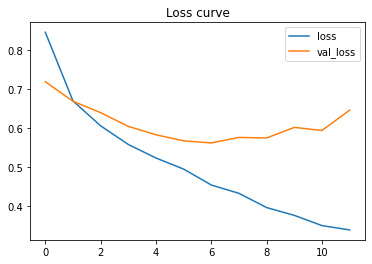

In [ ]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title = 'Loss curve')

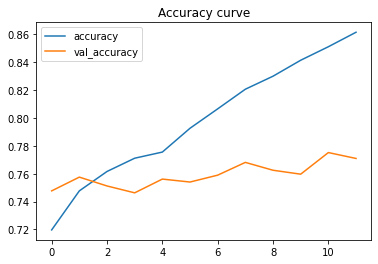

In [ ]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['accuracy', 'val_accuracy']].plot(title = 'Accuracy curve')

Za prikaz rezultata koji su postignuti nad setom podataka se korišćenjem kreiranog modela korišćena je metoda *Evaluate* kojoj se prosleđuju test setovi obeležja i ciljanih vrednosti. Kao rezultat metode, dobijaju se rezultati gubitka i tačnosti dobijeni primenom modela na set podataka. Rezultat tačnosti predviđanja klase slika je 75.90%.

In [ ]:
result = model.evaluate(X_test, y_test)

loss = result[0]
accuracy = result[1]
print(f"[+] Accuracy: {accuracy*100:.2f}%")

45/45 [==============================] - 8s 169ms/step - loss: 0.5620 - accuracy: 0.7590
[+] Accuracy: 75.90%


**Detekcija oštećenja**

Detekcija oštećenja predstavlja klasifikaciju fotografija u odnosu na detekovana oštećenja.

In [ ]:
df = pd.read_csv('/content/train.csv')
print('Dataframe shape: ', df.shape)
df.head()

Dataframe shape:  (7095, 3)


,ImageId,ClassId,EncodedPixels
0,0002cc93b.jpg,1,29102 12 29346 24 29602 24 29858 24 30114 24 3...
1,0007a71bf.jpg,3,18661 28 18863 82 19091 110 19347 110 19603 11...
2,000a4bcdd.jpg,1,37607 3 37858 8 38108 14 38359 20 38610 25 388...
3,000f6bf48.jpg,4,131973 1 132228 4 132483 6 132738 8 132993 11 ...
4,0014fce06.jpg,3,229501 11 229741 33 229981 55 230221 77 230468...


Podela data frame-a promenljive na osnovu vrednosti ImageId.

In [ ]:
df['ImageId'] = df['ImageId'].apply(lambda x: x.strip())
df.ImageId.describe()

count              7095
unique             6666
top       ef24da2ba.jpg
freq                  3
Name: ImageId, dtype: object

In [ ]:
train_img_set = set(list(os.listdir('train_images')))
print('Ukupan broj fotografija u train_images folderu: ', len(train_img_set))
defect_img_set = set(df['ImageId'].values)
print('Ukupan broj fotografija uključenih u fajl train.csv: ', len(defect_img_set))
if (defect_img_set.issubset(train_img_set)):
    print('Svi ImageId koji se nalaze u train.csv su takođe u train_images folderu.')

Ukupan broj fotografija u train_images folderu:  12568
Ukupan broj fotografija uključenih u fajl train.csv:  6666
Svi ImageId koji se nalaze u train.csv su takođe u train_images folderu.


Naredni grafikon prikazuje broj slika koje su oštećene i koje nisu oštećene u procentualnim vrednostima.

Broj ImageId-ijeva koji nisu oštećeni:  5902


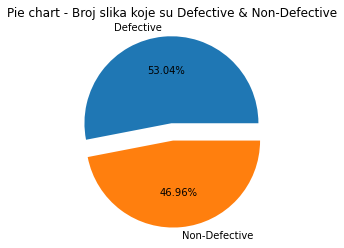

In [ ]:
print('Broj ImageId-ijeva koji nisu oštećeni: ', len(train_img_set) - len(defect_img_set))
non_defect_img_set = train_img_set - defect_img_set

plt.pie([len(defect_img_set), len(non_defect_img_set)], labels = ['Defective', 'Non-Defective'], explode = [0.1]*2, startangle = 0, autopct='%1.2f%%')
plt.title('Pie chart - Broj slika koje su Defective & Non-Defective')
plt.show()

In [ ]:
df['ClassId'].astype('str').describe()

count     7095
unique       4
top          3
freq      5150
Name: ClassId, dtype: object

 Naredni grafikon prikazuje procentualne vrednosti slika po klasama  u čitavom skupu fotografija.

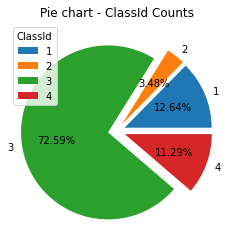

,ClassId,Count,count-percentage
0,1,897,12.642706
1,2,247,3.481325
2,3,5150,72.586328
3,4,801,11.289641


In [ ]:
ClassId_cnt_df = pd.DataFrame(df['ClassId'].value_counts().sort_index()).rename(columns = {'ClassId':'Count'})
ClassId_cnt_df['count-percentage'] = ClassId_cnt_df*100/ClassId_cnt_df.sum()

plt.pie(ClassId_cnt_df['Count'], labels = ClassId_cnt_df['Count'].index, explode = [0.1]*4, startangle = 0, autopct='%1.2f%%')
plt.legend(title = "ClassId")
plt.title('Pie chart - ClassId Counts')
plt.show()

ClassId_cnt_df.reset_index().rename(columns = {'index':'ClassId'})

In [ ]:
nos_labels_per_img_df = df.groupby('ImageId')['ClassId'].count()#reset_index()#.rename(columns = {'ClassId':'Count'})

nos_labels_per_img_df.head(10)

ImageId
0002cc93b.jpg    1
0007a71bf.jpg    1
000a4bcdd.jpg    1
000f6bf48.jpg    1
0014fce06.jpg    1
0025bde0c.jpg    2
002af848d.jpg    1
002fc4e19.jpg    2
0030401a5.jpg    1
0046839bd.jpg    1
Name: ClassId, dtype: int64

Naredna linija koda odnosi se na broj uočenih oštećanja po slikama. Druga naredna linija koda govori o tome kog su formata fotografije koje se nalaze u fajlu *train_images* koji je korišćen u projektu.

In [ ]:
data = nos_labels_per_img_df.value_counts().sort_index()
for index, value in data.items():
    print("Number of images with {} number of defect labels: {}".format(index, value))

Number of images with 1 number of defect labels: 6239
Number of images with 2 number of defect labels: 425
Number of images with 3 number of defect labels: 2


In [ ]:
img_shapes = set()
for img in list(os.listdir('train_images')):
    img_shapes.add(cv2.imread('train_images/'+img).shape)
img_shapes

{(256, 1600, 3)}

Sledeće ćelija jeste definisanje metode koja na osnovu prosleđene fotografije generiše odgovarajuću masku koja prikazuje poziciju  prepoznatih oštećenja.

In [ ]:
def rle2mask(mask_rle, shape=(1600,256)):
    '''
    mask_rle: run-length as string formated (start length)
    shape: (width,height) of array to return 
    Returns numpy array, 1 - mask, 0 - background

    '''
    s = mask_rle.split()
    starts, lengths = [np.asarray(x, dtype=int) for x in (s[0:][::2], s[1:][::2])]
    starts -= 1
    ends = starts + lengths
    img = np.zeros(shape[0]*shape[1], dtype=np.uint8)
    for lo, hi in zip(starts, ends):
        img[lo:hi] = 1
    return img.reshape(shape).T


Na kraju, prolazi se kroz čitav set podataka i za svaku pojedinačnu sliku generiše se njena maska pozivom prethodno definisane metode. Kao rezultat dobijaju se *side-by-side* stvarne fotografije i njihove maske, u rezultatu se prikazuju samo po pet fotografija iz svake klase.

In [ ]:
import random

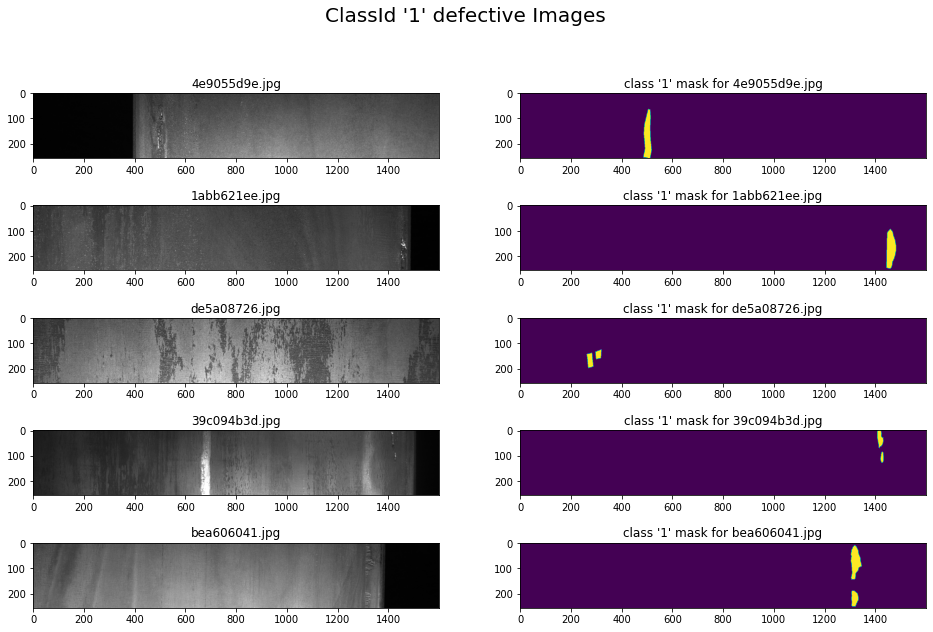

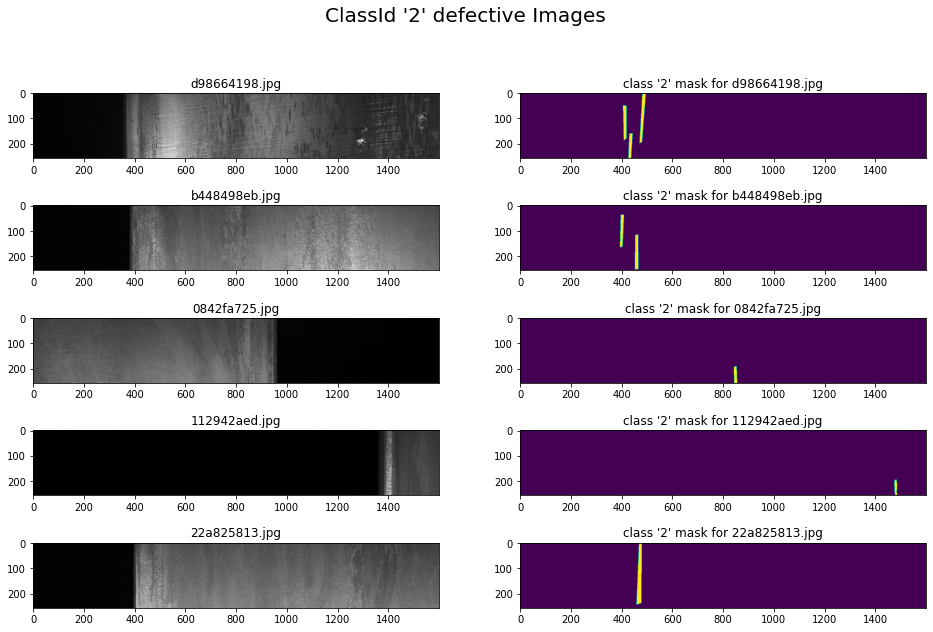

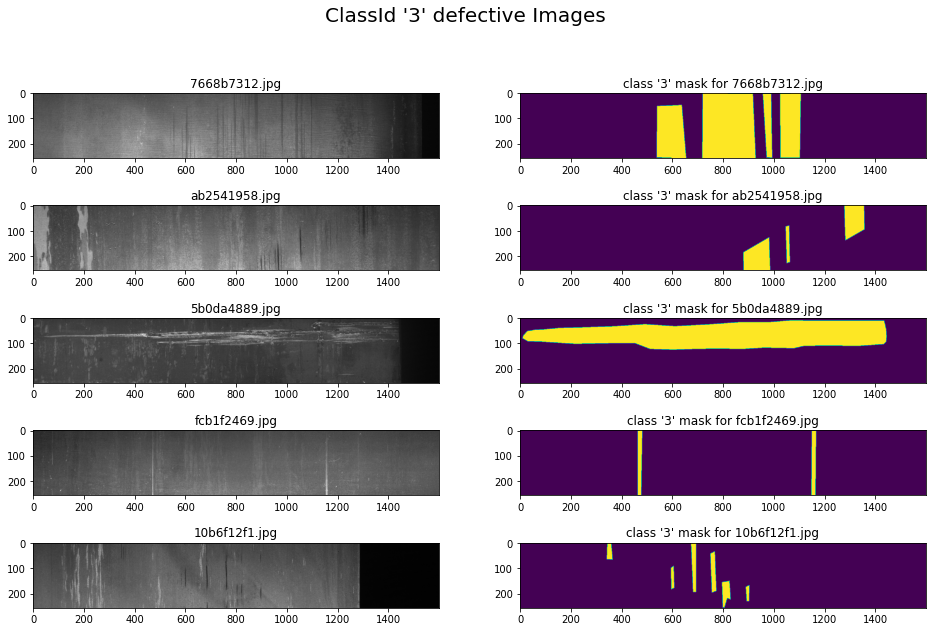

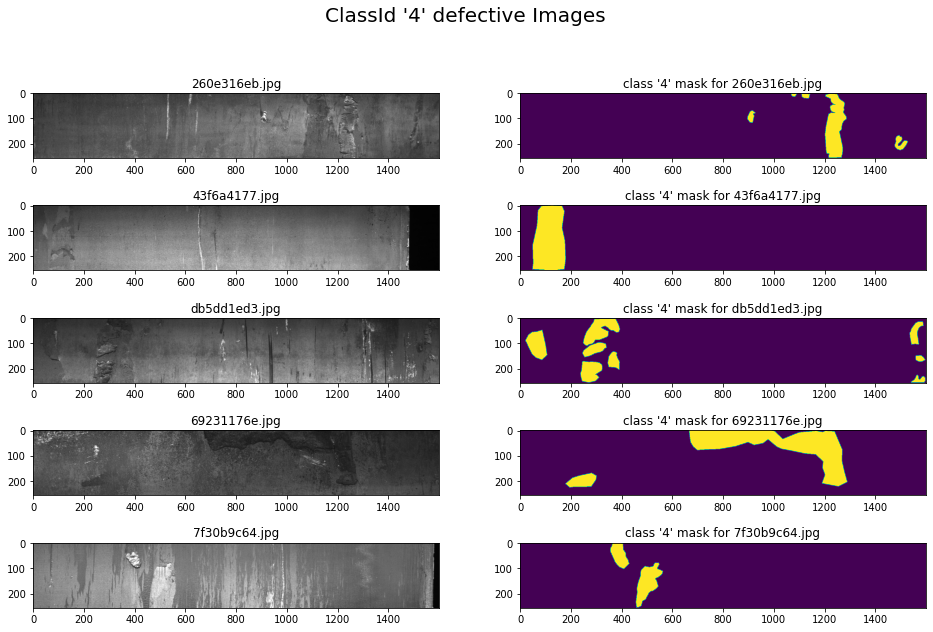

In [ ]:
for ClassId in [1,2,3,4]:
    class_df = df[df['ClassId'] == ClassId]
    fig, axs = plt.subplots(5, 2, figsize=(16,10))
    fig.suptitle("ClassId '{}' defective Images".format(ClassId), fontsize=20)
    x,y = 0,0
    for i, img_id in enumerate(random.sample(set(class_df['ImageId'].values), 5)):
        img_obj = cv2.imread('train_images/'+ img_id)
        axs[i,0].imshow(img_obj)
        axs[i,0].set_title(img_id)
        rle = class_df[class_df['ImageId'] == img_id]['EncodedPixels'].iloc[0]
        mask = rle2mask(rle)
        axs[i,1].imshow(mask)
        axs[i,1].set_title("class '{}' mask for ".format(ClassId) + img_id)
    plt.show()
    print('='*100)

ZAKLJUČAK

Istraživanjem došao sam do zaključka da se primenom CNN vrste neuronske mreže može izvršiti efikasno kreiranje modela algoritma mašinskog učenja koji je pogodan za rad sa fotografijama. Nakon 12. epohe prekinut je trening zato što model prestaje da daje bolje rezultate za vrednost gubitka

Tačnost je 75.9%. Što se tiče unapređenja algoritma to se može postići dodavanjem slojeva neuronske mreže i boljim podešavanjem hiperparametrima.

LITERATURA

[1] Vežbe 9 i 10








[2] scikit-learn: machine learning in python, [scikit-learn](https://scikit-learn.org/stable/)

[3] TensorFlow - CNN, [TensorFlow](https://www.tensorflow.org/tutorials/images/cnn)

[4] Happiest minds - CNN, [Happiest minds](https://www.happiestminds.com/insights/convolutional-neural-networks-cnns/#:~:text=Within%20Deep%20Learning%2C%20a%20Convolutional,image%20by%20using%20a%20CNN.)

[5] Geeks for Geeks, [GG](https://www.geeksforgeeks.org/) 